In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

In [75]:
#Import Datasets, remove All Star Team from the main Dataframe, and remove the "Tm" label from both datasets
df_main = pd.read_csv("./Data/cleaned_data.csv", delimiter = '\t')
df_all_stars = pd.read_csv("./Data/all_stars.csv", delimiter = '\t')
df_main = df_main.drop(columns =['Tm'])
df_all_stars = df_all_stars.drop(columns =['Tm'])
df_main

,Player,PTS,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,5.2,-0.635196,0.206292,-0.315059,0.032834,-0.265682,-0.331798,0.435515,-0.957010,...,-0.136166,-0.539862,1.715319,-0.366901,0.246799,-0.605531,-0.277504,1.987459,-0.591965,0.521759
1,Bam Adebayo,22.6,-0.195287,-0.526429,0.200930,1.376889,2.154425,2.038275,0.473375,-0.541172,...,1.154829,0.363192,1.496885,1.984685,1.998319,0.998600,-0.277504,-0.830641,0.663333,1.215277
2,Nickeil Alexander-Walker,7.3,-0.415242,1.488553,-0.487055,0.271777,-0.166225,0.025336,-0.224329,0.602382,...,-0.505022,1.148218,-0.578238,-0.541093,-0.561594,0.246663,0.123752,0.036467,-0.068924,-0.085069
3,Grayson Allen,3.5,0.244623,-1.075970,-0.315059,0.114970,-0.862421,-0.705166,-1.122148,-0.437213,...,0.140475,1.148218,0.186281,0.155674,0.179433,-0.405015,-0.076876,-0.830641,0.558725,0.348380
4,Jarrett Allen,17.0,-0.415242,-0.709609,0.028934,0.884069,1.060404,0.398704,1.452323,-0.957010,...,2.215289,0.302805,3.244357,3.204025,3.480375,-0.254628,1.528145,1.337129,0.349509,0.348380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Jaylin Williams,4.4,-1.295060,0.389472,-0.659052,-0.542123,-0.497747,-0.575299,0.419289,-0.021375,...,-0.597236,0.462006,-0.469021,0.068578,-0.090031,-0.154370,-0.277504,-0.180310,-0.696573,-0.431829
210,Kenrich Williams,0.6,0.464577,-0.160069,-0.659052,-1.146948,-0.928725,-0.932433,-0.851721,-0.957010,...,-0.781664,-1.596628,-0.796672,-0.715284,-0.797376,-0.705790,-0.879387,-0.830641,-1.010398,-1.038657
211,Delon Wright,8.0,0.904487,-0.709609,-0.487055,0.510720,-0.033617,-0.299331,1.041273,0.602382,...,-0.551129,1.148218,-0.359804,-0.062066,-0.157398,-0.003982,0.926262,-0.180310,-1.010398,-0.258449
212,Thaddeus Young,0.0,1.784306,-1.259150,-0.659052,-1.191750,-1.028181,-1.111000,-2.203859,-0.957010,...,-0.781664,-1.596628,-0.905889,-1.150763,-1.167890,-0.906306,-1.080014,-0.830641,-1.010398,-1.385416


In [76]:
df_all_stars

,Player,PTS,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Paolo Banchero,27.0,-1.295060,-0.160069,0.544923,1.302219,2.187577,2.346709,0.262441,1.434057,...,2.445823,0.475731,1.278451,1.723397,1.728855,1.098858,1.126890,0.470021,3.801580,0.348380
1,Devin Booker,27.5,0.024668,-0.709609,0.028934,1.608365,1.623991,1.535040,0.457149,0.914260,...,3.967353,1.013720,-0.578238,0.155674,-0.056348,2.101440,2.531283,-0.180310,1.918632,2.515624
2,Jalen Brunson,32.4,0.024668,0.939012,1.576901,1.481427,2.817468,3.142145,0.197539,1.122179,...,3.460177,0.530627,-0.250587,0.025030,-0.056348,2.853377,0.525007,-0.397087,1.814024,0.348380
3,Luka Don?i?,28.9,-0.635196,2.587634,3.124869,1.563563,2.353338,2.606443,0.208356,2.265732,...,2.445823,0.503179,-0.141370,2.637903,2.032002,3.154151,2.731911,0.036467,3.278539,0.781829
4,Kevin Durant,26.8,1.784306,-0.709609,0.028934,1.645700,2.054969,1.616207,0.781662,0.394463,...,3.137428,0.665125,-0.578238,1.592754,1.021510,0.747954,-0.076876,2.421013,1.604807,0.348380
5,Anthony Edwards,27.6,-1.075106,1.488553,2.092891,1.541162,2.220729,2.184375,0.397655,2.057814,...,2.169182,0.637676,0.295498,1.418562,1.189925,2.352086,1.929400,0.470021,2.441673,0.608449
6,Joel Embiid,33.0,0.464577,-0.343249,0.372927,1.593431,2.220729,2.492810,0.197539,1.330098,...,5.212241,0.761194,2.589055,2.202424,2.469882,1.951053,1.327517,2.421013,3.383147,1.475347
7,Shai Gilgeous-Alexander,30.2,-0.415242,0.389472,1.060912,1.488894,2.651707,2.525276,0.478783,0.706341,...,2.953000,0.571800,-0.032153,1.636302,1.257292,2.301957,1.528145,2.854567,1.290983,1.301967
8,LeBron James,27.8,2.664124,-0.526429,0.200930,1.556096,2.684859,2.103209,0.857382,1.122179,...,1.339256,0.431813,-0.032153,1.462110,1.122559,3.505055,3.735049,1.337129,2.964714,0.521759
9,Nikola Joki?,28.7,0.244623,0.755832,1.404905,1.511294,2.651707,2.184375,0.743802,0.290503,...,1.938647,0.876478,3.025923,3.116930,3.345642,3.454926,1.728773,0.686798,2.441673,0.955208


### In this specific instance, with how we will be using Stochastic Gradient Descent (SGD), we have to consider that the two "teams" of 15 players need to be evaluated relative to each other. By using traditional test-train split, we would need to know our target values in advance, when the target values (whether the "team member" wins or loses) are only known after the "teams" are created.

### Solution: 
### Run a trial loop for 1000 iterations, and using a loop parameter as the random_seed value in each iteration, grab 30 players, split the training dataframe halfway, and use discrete variable 'Winner' to decide which team wins (which team has a higher avg PTS). If both teams have the same avg PTS, then that iteration is skipped. After this is completed, the loop iteration that gives both a good amount of data and has a low amount of noise will be determined. The evaluation metrics will be accuracy, f1-score, precision, recall, and cross validation.

### Using this desired loop iteration count for the testing loop, the model will be reinitialized and retrained using the previously-found ideal amount of iteration.

### Once fitting loop is done, run a testing loop and evaluate the performance.

### For all of these, there will be a safeguard and check to see if any of the random teams happen to be the All Star Team. This has a very low chance of occuring, but that iteration would be skipped. Additionally, on the trial and testing loops, matchups that would result in a statistical tie are also skipped.

### Finally, run another loop to generate random "teams" to challenge the All Star Team

### First We will do a trial test loop to decide at which point we will train the model to avoid overfitting

In [77]:
#Initializing Model Object
SGD = SGDClassifier(loss="log_loss")

#Arrays for gathering evaluation statistics
acc_list = list()
f1_list = list()
prec_list = list()
recall_list = list()
cross_val_list = list()

#Trial Training Loop
for i in range(1000):
    #Getting random sample, and splitting into two teams
    df_train = df_main.sample(n=30, random_state = i)
    df_train_A = df_train.iloc[:15, :].copy()
    df_train_B = df_train.iloc[15:, :].copy()
    
    #Checking to see either team happens to be the all star team
    if (set(df_all_stars['Player']) == set(df_train_A['Player']) or set(df_all_stars['Player']) == set(df_train_B['Player'])):
        print(f"All star team was randomly selected in iteration {i}. Skipping iteration")
        continue
    
    #Getting the average score, and comparing scores to assign a winning and losing team
    score_A = np.mean(df_train_A['PTS'])
    score_B = np.mean(df_train_B['PTS'])
    
    if score_A > score_B:
        df_train_A['Winner'] = 1
        df_train_B['Winner'] = 0
        
    elif score_A < score_B:
        df_train_A['Winner'] = 0
        df_train_B['Winner'] = 1      
    
    #In the event of a tie
    else:
        print(f"Theoretical tie in iteration {i}. Skipping iteration")
        continue
        
    #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
    df_train_A = df_train_A.drop(columns=['Player', 'PTS'])
    df_train_B = df_train_B.drop(columns=['Player', 'PTS'])
    df_train_final = pd.concat([df_train_A, df_train_B], axis = 0)
    
    #Separating the features and target, and fitting the model with them
    X = df_train_final.iloc[:, :-1]
    y = df_train_final['Winner']
    SGD.partial_fit(X, y, classes= [0, 1])
    
    #Testing
    df_test = df_main.sample(n=30, random_state = i + 10000)
    
    #Getting random sample, and splitting into two teams
    df_test = df_main.sample(n=30, random_state = i)
    df_test_A = df_test.iloc[:15, :].copy()
    df_test_B = df_test.iloc[15:, :].copy()
    
    #Checking to see either team happens to be the all star team
    if (set(df_all_stars['Player']) == set(df_test_A['Player']) or set(df_all_stars['Player']) == set(df_test_B['Player'])):
        print(f"All star team was randomly selected in iteration {i}. Skipping iteration")
        continue
    
    #Getting the average score, and comparing scores to assign a winning and losing team
    score_A = np.mean(df_test_A['PTS'])
    score_B = np.mean(df_test_B['PTS'])
    
    if score_A > score_B:
        df_test_A['Winner'] = 1
        df_test_B['Winner'] = 0
        
    elif score_A < score_B:
        df_test_A['Winner'] = 0
        df_test_B['Winner'] = 1      
    
    #In the event of a tie
    else:
        print(f"Theoretical tie in iteration {i}. Skipping iteration")
        continue
        
    #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
    df_test_A = df_test_A.drop(columns=['Player', 'PTS'])
    df_test_B = df_test_B.drop(columns=['Player', 'PTS'])
    df_test_final = pd.concat([df_test_A, df_test_B], axis = 0)
    
    #Separating the features and target, and fitting the model with them
    X = df_test_final.iloc[:, :-1]
    y = df_test_final['Winner']
    
    #Evaluating Model and recording evaluation statistics
    pred = SGD.predict(X)
    
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    recall = recall_score(y, pred)
    cross_val = cross_val_score(SGD, X, y, cv=10)
    
    acc_list.append(acc)
    f1_list.append(f1)
    prec_list.append(prec)
    recall_list.append(recall)
    cross_val_list.append(cross_val)

Theoretical tie in iteration 169. Skipping iteration


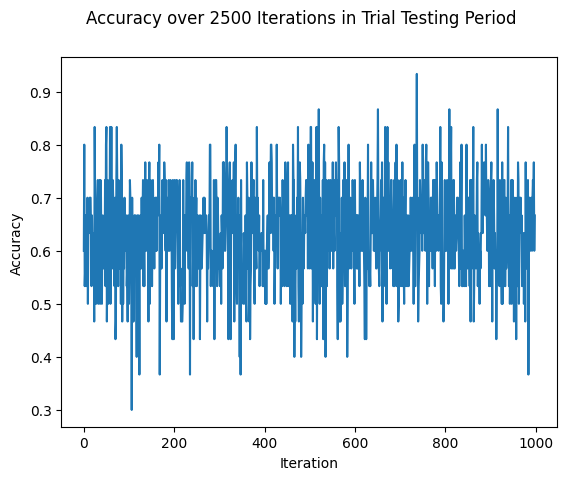

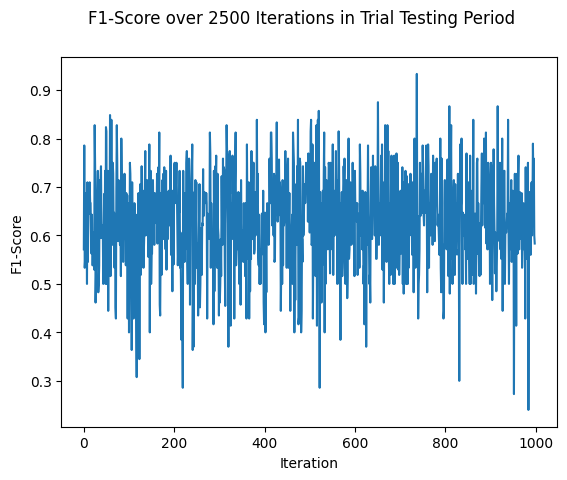

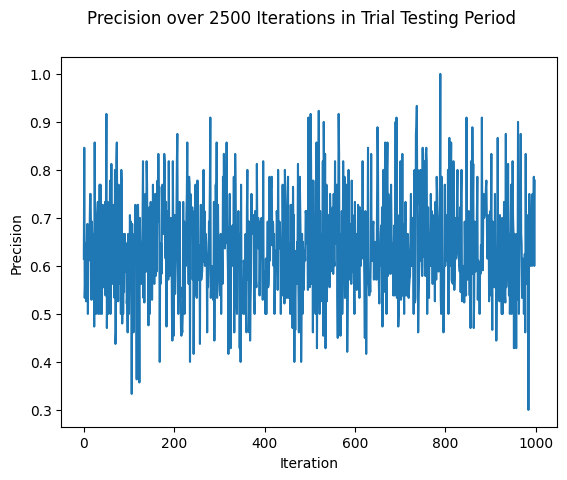

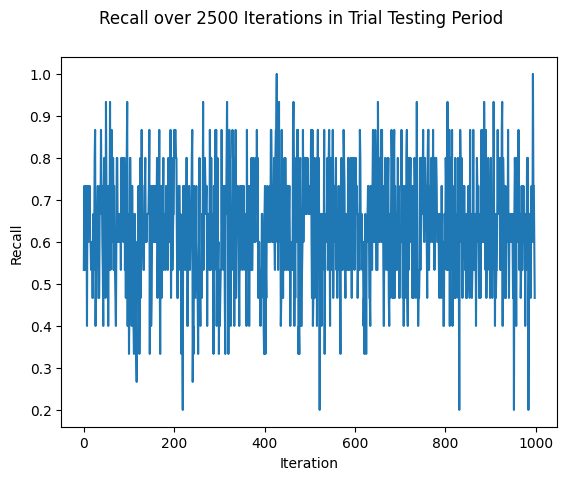

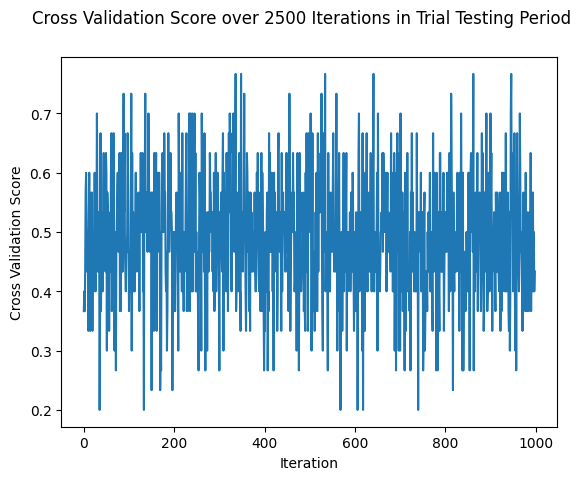

In [78]:
#Generating Dataframe using data from trial training
def avg_cross_val(cross_val):
    return np.mean(cross_val)

df_trial = pd.DataFrame()
df_trial["Iteration"] = range(len(acc_list))
df_trial["Accuracy"] = acc_list
df_trial["F1-Score"] = f1_list
df_trial["Precision"] = prec_list
df_trial["Recall"] = recall_list
df_trial["Cross Validation Score"] = cross_val_list
df_trial["Cross Validation Score"] = df_trial["Cross Validation Score"].apply(avg_cross_val)

#Outputing Graphs of each metric per iteration
for metric in ["Accuracy", "F1-Score", "Precision", "Recall", "Cross Validation Score"]:
    plt.figure()
    sns.lineplot(data = df_trial, x = "Iteration", y = metric)
    plt.suptitle(f"{metric} over 2500 Iterations in Trial Testing Period")
    plt.savefig(f"./Figures/SGD/{metric}_trial_performance.png", dpi=100, bbox_inches = "tight")

### The graphs show that the evaluation statistics never quite stabilize. This reflects the idea that different random combinations of players could lead to players being somewhat difficult to consider "winners" or "losers". Additionally, these fluctuations are likely just noise caused by low information matchups, such as both "teams" having uniformly low or uniformly high scores that lead to the inability to properly judge more lopsided score matchups. It could also be that the test matchups have a similar issue with both "teams" having similar scores, making prediction difficult. Since the partial_fit() function would treat most of the fitting information equally, a cyclical pattern would emerge where the model would have more or less bad matchup data at different iteration points. As such, we will look at the median f1-score, as that represents the models that have been fed a good amount of useful data, and select an iteration count that leads to an f1-score at the median.

In [ ]:
#Getting all the iteration counts that had the same f1-score as the median f1-score, and grabbing the smallest iteration value above 800 to be best_value
df_best_value = df_trial[df_trial['F1-Score'] == np.median(df_trial['F1-Score'])].head(50)
df_best_value = df_best_value.loc[df_best_value['Iteration'] > 800]

try:
    best_value = df_best_value.iloc[0,0]
except:
    try:
        #If it happens that there are no iteration values above 800, just take the largest iteration less than 800
        df_best_value = df_trial[df_trial['F1-Score'] == np.median(df_trial['F1-Score'])].head(50)
        best_value = df_best_value.iloc[-1, 0]
    except:
        #If no values are the same as the median, skip to the next aggregate iteration
        print(f"No trial iterations had the same f1-score as the median value for aggregate iteration {m}. Skipping aggregate iteration.")

df_best_value

,Iteration,Accuracy,F1-Score,Precision,Recall,Cross Validation Score
806,806,0.7,0.64,0.8,0.533333,0.6
827,827,0.7,0.64,0.8,0.533333,0.6


### With the best value determined for the iteration count of the training loop, we will now train the model we will use with the All Star team.

In [80]:
#Reinitializing Model Object
SGD = SGDClassifier(loss="log_loss")

#Arrays for gathering evaluation statistics
acc_list = list()
f1_list = list()
prec_list = list()
recall_list = list()
cross_val_list = list()

#Actual Training Loop
for j in range(best_value):
    #Getting random sample, and splitting into two teams
    df_train = df_main.sample(n=30, random_state = j)
    df_train_A = df_train.iloc[:15, :].copy()
    df_train_B = df_train.iloc[15:, :].copy()
    
    #Checking to see either team happens to be the all star team
    if (set(df_all_stars['Player']) == set(df_train_A['Player']) or set(df_all_stars['Player']) == set(df_train_B['Player'])):
        print(f"All star team was randomly selected in iteration {j}. Skipping iteration")
        continue
    
    #Getting the average score, and comparing scores to assign a winning and losing team
    score_A = np.mean(df_train_A['PTS'])
    score_B = np.mean(df_train_B['PTS'])
    
    if score_A > score_B:
        df_train_A['Winner'] = 1
        df_train_B['Winner'] = 0
        
    elif score_A < score_B:
        df_train_A['Winner'] = 0
        df_train_B['Winner'] = 1      
    
    #In the event of a tie
    else:
        print(f"Theoretical tie in iteration {j}. Skipping iteration")
        continue
        
    #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
    df_train_A = df_train_A.drop(columns=['Player', 'PTS'])
    df_train_B = df_train_B.drop(columns=['Player', 'PTS'])
    df_train_final = pd.concat([df_train_A, df_train_B], axis = 0)
    
    #Separating the features and target, and fitting the model with them
    X = df_train_final.iloc[:, :-1]
    y = df_train_final['Winner']
    SGD.partial_fit(X, y, classes= [0, 1])
    
    #Testing
    df_test = df_main.sample(n=30, random_state = i + 10000)
    
    #Getting random sample, and splitting into two teams
    df_test = df_main.sample(n=30, random_state = j)
    df_test_A = df_test.iloc[:15, :].copy()
    df_test_B = df_test.iloc[15:, :].copy()
    
    #Checking to see either team happens to be the all star team
    if (set(df_all_stars['Player']) == set(df_test_A['Player']) or set(df_all_stars['Player']) == set(df_test_B['Player'])):
        print(f"All star team was randomly selected in iteration {j}. Skipping iteration")
        continue
    
    #Getting the average score, and comparing scores to assign a winning and losing team
    score_A = np.mean(df_test_A['PTS'])
    score_B = np.mean(df_test_B['PTS'])
    
    if score_A > score_B:
        df_test_A['Winner'] = 1
        df_test_B['Winner'] = 0
        
    elif score_A < score_B:
        df_test_A['Winner'] = 0
        df_test_B['Winner'] = 1      
    
    #In the event of a tie
    else:
        print(f"Theoretical tie in iteration {j}. Skipping iteration")
        continue
        
    #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
    df_test_A = df_test_A.drop(columns=['Player', 'PTS'])
    df_test_B = df_test_B.drop(columns=['Player', 'PTS'])
    df_test_final = pd.concat([df_test_A, df_test_B], axis = 0)
    
    #Separating the features and target, and fitting the model with them
    X = df_test_final.iloc[:, :-1]
    y = df_test_final['Winner']
    
    #Evaluating Model and recording evaluation statistics
    pred = SGD.predict(X)
    
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    recall = recall_score(y, pred)
    cross_val = cross_val_score(SGD, X, y, cv=10)
    
    acc_list.append(acc)
    f1_list.append(f1)
    prec_list.append(prec)
    recall_list.append(recall)
    cross_val_list.append(cross_val)

Theoretical tie in iteration 169. Skipping iteration


### Now that the training loop is done, the testing loop will now be performed

In [81]:
#Arrays for gathering evaluation statistics
acc_list = list()
f1_list = list()
prec_list = list()
recall_list = list()
cross_val_list = list()

#Testing Loop
for k in range(10000, 10050):
    #Getting random sample, and splitting into two teams
    df_test = df_main.sample(n=30, random_state = k)
    df_test_A = df_test.iloc[:15, :].copy()
    df_test_B = df_test.iloc[15:, :].copy()
    
    #Checking to see either team happens to be the all star team
    if (set(df_all_stars['Player']) == set(df_test_A['Player']) or set(df_all_stars['Player']) == set(df_test_B['Player'])):
        print(f"All star team was randomly selected in iteration {k}. Skipping iteration")
        continue
    
    #Getting the average score, and comparing scores to assign a winning and losing team
    score_A = np.mean(df_test_A['PTS'])
    score_B = np.mean(df_test_B['PTS'])
    
    if score_A > score_B:
        df_test_A['Winner'] = 1
        df_test_B['Winner'] = 0
        
    elif score_A < score_B:
        df_test_A['Winner'] = 0
        df_test_B['Winner'] = 1      
    
    #In the event of a tie
    else:
        print(f"Theoretical tie in iteration {k}. Skipping iteration")
        continue
        
    #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
    df_test_A = df_test_A.drop(columns=['Player', 'PTS'])
    df_test_B = df_test_B.drop(columns=['Player', 'PTS'])
    df_test_final = pd.concat([df_test_A, df_test_B], axis = 0)
    
    #Separating the features and target, and fitting the model with them
    X = df_test_final.iloc[:, :-1]
    y = df_test_final['Winner']
    
    #Evaluating Model and recording evaluation statistics
    pred = SGD.predict(X)
    
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    recall = recall_score(y, pred)
    cross_val = cross_val_score(SGD, X, y, cv=10)
    
    acc_list.append(acc)
    f1_list.append(f1)
    prec_list.append(prec)
    recall_list.append(recall)
    cross_val_list.append(cross_val)
    
    print(f"Testing Iteration {k-10000}:\nAccuracy: {acc}\nf1-score: {f1}\nPrecision: {prec}\nRecall: {recall}\nCross-Validation: {cross_val}\n\n")


Testing Iteration 0:
Accuracy: 0.43333333333333335
f1-score: 0.48484848484848486
Precision: 0.4444444444444444
Recall: 0.5333333333333333
Cross-Validation: [0.66666667 0.66666667 0.33333333 1.         0.         0.
 0.66666667 0.66666667 0.66666667 0.66666667]


Testing Iteration 1:
Accuracy: 0.4666666666666667
f1-score: 0.38461538461538464
Precision: 0.45454545454545453
Recall: 0.3333333333333333
Cross-Validation: [0.66666667 0.33333333 0.         0.         0.66666667 0.66666667
 0.66666667 0.33333333 1.         0.66666667]


Testing Iteration 2:
Accuracy: 0.6
f1-score: 0.6
Precision: 0.6
Recall: 0.6
Cross-Validation: [0.66666667 0.33333333 0.         0.66666667 0.33333333 0.33333333
 0.33333333 1.         1.         1.        ]


Testing Iteration 3:
Accuracy: 0.43333333333333335
f1-score: 0.5641025641025641
Precision: 0.4583333333333333
Recall: 0.7333333333333333
Cross-Validation: [0.66666667 0.66666667 0.33333333 0.33333333 0.         1.
 0.66666667 0.66666667 0.33333333 0.3333333

In [82]:
print(f"Average Accuracy: {np.mean(acc_list)}\nAverage f1-score: {np.mean(f1_list)}\nAverage Precision: {np.mean(prec_list)}\nAverage Recall: {np.mean(recall_list)}\nAverage Cross-Validation: {np.mean(cross_val_list)}")

Average Accuracy: 0.532
Average f1-score: 0.5565583051303951
Average Precision: 0.5273785723220709
Average Recall: 0.596
Average Cross-Validation: 0.49866666666666665


### Now that the model has been evaluated and is able to predict whom the winner "should" be just better than average with an f1-score of roughly 55%, we will now use it to evaluate whether the All Star team truly is the statistically best team

In [83]:
#Preparing the All Star dataset for the testing phase
all_star_players = list(df_all_stars['Player'])
df_all_stars = df_all_stars.drop(columns=['Player','PTS'])
df_all_stars['Winner'] = 1
df_all_stars

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Winner
0,-1.295060,-0.160069,0.544923,1.302219,2.187577,2.346709,0.262441,1.434057,1.206118,0.671950,...,0.475731,1.278451,1.723397,1.728855,1.098858,1.126890,0.470021,3.801580,0.348380,1
1,0.024668,-0.709609,0.028934,1.608365,1.623991,1.535040,0.457149,0.914260,0.924603,0.431743,...,1.013720,-0.578238,0.155674,-0.056348,2.101440,2.531283,-0.180310,1.918632,2.515624,1
2,0.024668,0.939012,1.576901,1.481427,2.817468,3.142145,0.197539,1.122179,1.527850,0.239578,...,0.530627,-0.250587,0.025030,-0.056348,2.853377,0.525007,-0.397087,1.814024,0.348380,1
3,-0.635196,2.587634,3.124869,1.563563,2.353338,2.606443,0.208356,2.265732,2.774561,0.297228,...,0.503179,-0.141370,2.637903,2.032002,3.154151,2.731911,0.036467,3.278539,0.781829,1
4,1.784306,-0.709609,0.028934,1.645700,2.054969,1.616207,0.781662,0.394463,0.120274,0.753620,...,0.665125,-0.578238,1.592754,1.021510,0.747954,-0.076876,2.421013,1.604807,0.348380,1
5,-1.075106,1.488553,2.092891,1.541162,2.220729,2.184375,0.397655,2.057814,1.809366,0.671950,...,0.637676,0.295498,1.418562,1.189925,2.352086,1.929400,0.470021,2.441673,0.608449,1
6,0.464577,-0.343249,0.372927,1.593431,2.220729,2.492810,0.197539,1.330098,1.527850,0.350073,...,0.761194,2.589055,2.202424,2.469882,1.951053,1.327517,2.421013,3.383147,1.475347,1
7,-0.415242,0.389472,1.060912,1.488894,2.651707,2.525276,0.478783,0.706341,0.401789,0.825682,...,0.571800,-0.032153,1.636302,1.257292,2.301957,1.528145,2.854567,1.290983,1.301967,1
8,2.664124,-0.526429,0.200930,1.556096,2.684859,2.103209,0.857382,1.122179,1.005036,0.599888,...,0.431813,-0.032153,1.462110,1.122559,3.505055,3.735049,1.337129,2.964714,0.521759,1
9,0.244623,0.755832,1.404905,1.511294,2.651707,2.184375,0.743802,0.290503,0.683304,0.018588,...,0.876478,3.025923,3.116930,3.345642,3.454926,1.728773,0.686798,2.441673,0.955208,1


In [84]:
#Arrays for gathering evaluation statistics
acc_list = list()
f1_list = list()
prec_list = list()
recall_list = list()
cross_val_list = list()
all_star_victories = challenger_victories = ties = 0

#Prediction Loop
for l in range(10050, 10100):
    #Getting test sample and preparing it for evaluation against the All Star team
    df_matchup = df_main.sample(n=15, random_state = l)
    test_players = list(df_matchup['Player'])
    df_matchup = df_matchup.drop(columns=['Player', 'PTS'])
    df_matchup['Winner'] = 0
    
    #Combining test sample with all star team to create dataframe to be evaluated
    df_matchup = pd.concat([df_matchup, df_all_stars], axis = 0)
    X = df_matchup.iloc[:, :-1]
    y = df_matchup['Winner']
    
    #Evaluating Model and recording evaluation statistics
    pred = SGD.predict(X)
    
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    recall = recall_score(y, pred)
    cross_val = cross_val_score(SGD, X, y, cv=10)
    
    acc_list.append(acc)
    f1_list.append(f1)
    prec_list.append(prec)
    recall_list.append(recall)
    cross_val_list.append(cross_val)
    
    #Determine winner
    winner = None
    if f1 > 0.5:
        winner = "All Stars have won!"
        all_star_victories += 1
    elif f1 < 0.5:
        winner = "Challengers have won!"
        challenger_victories += 1
    else:
        winner = "There was a tie!"
        ties += 1
    
    print(f"{all_star_players} vs. {test_players}")
    print(winner)
    print(f"Accuracy: {acc}\nf1-score: {f1}\nPrecision: {prec}\nRecall: {recall}\nCross-Validation: {cross_val}\n\n")

['Paolo Banchero', 'Devin Booker', 'Jalen Brunson', 'Luka Don?i?', 'Kevin Durant', 'Anthony Edwards', 'Joel Embiid', 'Shai Gilgeous-Alexander', 'LeBron James', 'Nikola Joki?', 'Damian Lillard', 'Tyrese Maxey', 'Khris Middleton', 'Donovan Mitchell', 'Jayson Tatum'] vs. ['Moritz Wagner', 'T.J. Warren', 'MarJon Beauchamp', 'Paolo Banchero', 'Malik Beasley', 'Ousmane Dieng', 'Luke Kornet', 'Naji Marshall', 'Cole Anthony', 'Amir Coffey', 'Bradley Beal', 'Josh Green', 'Mamadi Diakite', 'Justin Holiday', 'Taurean Prince']
All Stars have won!
Accuracy: 0.7333333333333333
f1-score: 0.7894736842105263
Precision: 0.6521739130434783
Recall: 1.0
Cross-Validation: [0.66666667 0.66666667 1.         1.         1.         0.66666667
 1.         1.         0.66666667 1.        ]


['Paolo Banchero', 'Devin Booker', 'Jalen Brunson', 'Luka Don?i?', 'Kevin Durant', 'Anthony Edwards', 'Joel Embiid', 'Shai Gilgeous-Alexander', 'LeBron James', 'Nikola Joki?', 'Damian Lillard', 'Tyrese Maxey', 'Khris Middleton

In [85]:
print(f"Average Accuracy: {np.mean(acc_list)}\nAverage f1-score: {np.mean(f1_list)}\nAverage Precision: {np.mean(prec_list)}\nAverage Recall: {np.mean(recall_list)}\nAverage Cross-Validation: {np.mean(cross_val_list)}")
print(f"All Star Team Victories: {all_star_victories}\nChallenger Team Victories: {challenger_victories}\nTies: {ties}")

Average Accuracy: 0.7093333333333333
Average f1-score: 0.7762276762084208
Average Precision: 0.6355519311606268
Average Recall: 1.0
Average Cross-Validation: 0.802
All Star Team Victories: 50
Challenger Team Victories: 0
Ties: 0


### The results show that the model believes that the All Star team is in fact undefeated, with no losses or ties, and the model having an average f1-score of roughly 77.6%. This shows that the model was able to determine the All Star Team would be the victors with a good sense of certainty, only making minimal errors when predicting which "team members" were a part of the "winning" and "losing" team.

### However, I noticed that performance could fluctuate quite a bit when testing the model and could give opposites quite to the contrary of what was received here, so to be thorough, I will run through several iterations of trial->train->test->predict to ensure that the evaluation statistics are consistent across many different models' performances. If they are not, then the mean statistics will be used as the final say as to whether the models believe the All Star team is the best.

In [4]:
#Arrays for gathering evaluation statistics of All Star evaluation for entire loop
final_acc_list = list()
final_f1_list = list()
final_prec_list = list()
final_recall_list = list()
final_cross_val_list = list()
final_training_iter_list = list()
final_all_star_victories = list()
final_challenger_victories = list() 
final_ties = list()
final_all_star_victories = list()

#Arrays for gathering evaluation statistics of testing evaluation for entire loop
test_acc_list = list()
test_f1_list = list()
test_prec_list = list()
test_recall_list = list()
test_cross_val_list = list()

#Aggregate Loop of 100 Models' Prediction
for m in range(1, 101):
    
    #Import Datasets, remove All Star Team from the main Dataframe, and remove the "Tm" label from both datasets
    df_main = pd.read_csv("./Data/cleaned_data.csv", delimiter = '\t')
    df_all_stars = pd.read_csv("./Data/all_stars.csv", delimiter = '\t')
    df_main = df_main.drop(columns =['Tm'])
    df_all_stars = df_all_stars.drop(columns =['Tm'])
    
    #Initializing Model Object
    SGD = SGDClassifier(loss="log_loss")

    #Arrays for gathering evaluation statistics for trial training performance
    acc_list = list()
    f1_list = list()
    prec_list = list()
    recall_list = list()
    cross_val_list = list()

    #Trial Training Loop
    for i in range(1000):
        #Getting random sample, and splitting into two teams
        df_train = df_main.sample(n=30, random_state = (i*m))
        df_train_A = df_train.iloc[:15, :].copy()
        df_train_B = df_train.iloc[15:, :].copy()
        
        #Checking to see either team happens to be the all star team
        if (set(df_all_stars['Player']) == set(df_train_A['Player']) or set(df_all_stars['Player']) == set(df_train_B['Player'])):
            print(f"All star team was randomly selected in trial training iteration {i} for aggregate iteration {m}. Skipping iteration")
            continue
        
        #Getting the average score, and comparing scores to assign a winning and losing team
        score_A = np.mean(df_train_A['PTS'])
        score_B = np.mean(df_train_B['PTS'])
        
        if score_A > score_B:
            df_train_A['Winner'] = 1
            df_train_B['Winner'] = 0
            
        elif score_A < score_B:
            df_train_A['Winner'] = 0
            df_train_B['Winner'] = 1      
        
        #In the event of a tie
        else:
            print(f"Theoretical tie in trial training iteration {i} for aggregate iteration {m}. Skipping iteration")
            continue
            
        #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
        df_train_A = df_train_A.drop(columns=['Player', 'PTS'])
        df_train_B = df_train_B.drop(columns=['Player', 'PTS'])
        df_train_final = pd.concat([df_train_A, df_train_B], axis = 0)
        
        #Separating the features and target, and fitting the model with them
        X = df_train_final.iloc[:, :-1]
        y = df_train_final['Winner']
        SGD.partial_fit(X, y, classes= [0, 1])
        
        #Testing
        df_test = df_main.sample(n=30, random_state = i + 90000)
        
        #Getting random sample, and splitting into two teams
        df_test = df_main.sample(n=30, random_state = i)
        df_test_A = df_test.iloc[:15, :].copy()
        df_test_B = df_test.iloc[15:, :].copy()
        
        #Checking to see either team happens to be the all star team
        if (set(df_all_stars['Player']) == set(df_test_A['Player']) or set(df_all_stars['Player']) == set(df_test_B['Player'])):
            print(f"All star team was randomly selected in trial training evaluation iteration {i} for aggregate iteration {m}. Skipping iteration")
            continue
        
        #Getting the average score, and comparing scores to assign a winning and losing team
        score_A = np.mean(df_test_A['PTS'])
        score_B = np.mean(df_test_B['PTS'])
        
        if score_A > score_B:
            df_test_A['Winner'] = 1
            df_test_B['Winner'] = 0
            
        elif score_A < score_B:
            df_test_A['Winner'] = 0
            df_test_B['Winner'] = 1      
        
        #In the event of a tie
        else:
            print(f"Theoretical tie in trial training evaluation iteration {i} for aggregate iteration {m}. Skipping iteration")
            continue
            
        #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
        df_test_A = df_test_A.drop(columns=['Player', 'PTS'])
        df_test_B = df_test_B.drop(columns=['Player', 'PTS'])
        df_test_final = pd.concat([df_test_A, df_test_B], axis = 0)
        
        #Separating the features and target, and fitting the model with them
        X = df_test_final.iloc[:, :-1]
        y = df_test_final['Winner']
        
        #Evaluating Model and recording evaluation statistics
        pred = SGD.predict(X)
        
        acc = accuracy_score(y, pred)
        f1 = f1_score(y, pred)
        prec = precision_score(y, pred)
        recall = recall_score(y, pred)
        cross_val = cross_val_score(SGD, X, y, cv=10)
        
        acc_list.append(acc)
        f1_list.append(f1)
        prec_list.append(prec)
        recall_list.append(recall)
        cross_val_list.append(cross_val)
        
    #Generating Dataframe using data from trial training
    def avg_cross_val(cross_val):
        return np.mean(cross_val)

    df_trial = pd.DataFrame()
    df_trial["Iteration"] = range(len(acc_list))
    df_trial["Accuracy"] = acc_list
    df_trial["F1-Score"] = f1_list
    df_trial["Precision"] = prec_list
    df_trial["Recall"] = recall_list
    df_trial["Cross Validation Score"] = cross_val_list
    df_trial["Cross Validation Score"] = df_trial["Cross Validation Score"].apply(avg_cross_val)
    
    #Getting all the iteration counts that had the same f1-score as the median f1-score, and grabbing the smallest iteration value above 800 to be best_value
    df_best_value = df_trial[df_trial['F1-Score'] == np.median(df_trial['F1-Score'])].head(50)
    df_best_value = df_best_value.loc[df_best_value['Iteration'] > 800]
    try:
        best_value = df_best_value.iloc[0,0]
    except:
        try:
            #If it happens that there are no iteration values above 800, just take the largest iteration less than 800
            df_best_value = df_trial[df_trial['F1-Score'] == np.median(df_trial['F1-Score'])].head(50)
            best_value = df_best_value.iloc[-1, 0]
        except:
            #If no values are the same as the median, skip to the next aggregate iteration
            print(f"No trial iterations had the same f1-score as the median value for aggregate iteration {m}. Skipping aggregate iteration.")
            continue
            
    
    #Recording best_value for training loop for this aggregate iteration
    final_training_iter_list.append(best_value)
    
    #Reinitializing Model Object
    SGD = SGDClassifier(loss="log_loss")

    #Actual Training Loop
    for j in range(30000, 30000+best_value):
        #Getting random sample, and splitting into two teams
        df_train = df_main.sample(n=30, random_state = (j*m))
        df_train_A = df_train.iloc[:15, :].copy()
        df_train_B = df_train.iloc[15:, :].copy()
        
        #Checking to see either team happens to be the all star team
        if (set(df_all_stars['Player']) == set(df_train_A['Player']) or set(df_all_stars['Player']) == set(df_train_B['Player'])):
            print(f"All star team was randomly selected in training iteration {j-30000} for aggregate iteration {m}. Skipping iteration")
            continue
        
        #Getting the average score, and comparing scores to assign a winning and losing team
        score_A = np.mean(df_train_A['PTS'])
        score_B = np.mean(df_train_B['PTS'])
        
        if score_A > score_B:
            df_train_A['Winner'] = 1
            df_train_B['Winner'] = 0
            
        elif score_A < score_B:
            df_train_A['Winner'] = 0
            df_train_B['Winner'] = 1      
        
        #In the event of a tie
        else:
            print(f"Theoretical tie in training iteration {j-30000} for aggregate iteration {m}. Skipping iteration")
            continue
            
        #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
        df_train_A = df_train_A.drop(columns=['Player', 'PTS'])
        df_train_B = df_train_B.drop(columns=['Player', 'PTS'])
        df_train_final = pd.concat([df_train_A, df_train_B], axis = 0)
        
        #Separating the features and target, and fitting the model with them
        X = df_train_final.iloc[:, :-1]
        y = df_train_final['Winner']
        SGD.partial_fit(X, y, classes= [0, 1])
    
    #Arrays for gathering evaluation statistics for testing performance
    acc_list = list()
    f1_list = list()
    prec_list = list()
    recall_list = list()
    cross_val_list = list()
        
    #Testing Loop
    for k in range(50000, 50050):
        #Getting random sample, and splitting into two teams
        df_test = df_main.sample(n=30, random_state = (k*m))
        df_test_A = df_test.iloc[:15, :].copy()
        df_test_B = df_test.iloc[15:, :].copy()
        
        #Checking to see either team happens to be the all star team
        if (set(df_all_stars['Player']) == set(df_test_A['Player']) or set(df_all_stars['Player']) == set(df_test_B['Player'])):
            print(f"All star team was randomly selected in testing iteration {k-50000} for aggregate iteration {m}. Skipping iteration")
            continue
        
        #Getting the average score, and comparing scores to assign a winning and losing team
        score_A = np.mean(df_test_A['PTS'])
        score_B = np.mean(df_test_B['PTS'])
        
        if score_A > score_B:
            df_test_A['Winner'] = 1
            df_test_B['Winner'] = 0
            
        elif score_A < score_B:
            df_test_A['Winner'] = 0
            df_test_B['Winner'] = 1      
        
        #In the event of a tie
        else:
            print(f"Theoretical tie in testing iteration {k-50000} for aggregate iteration {m}. Skipping iteration")
            continue
            
        #Dropping 'PTS' and 'Player' column from both dfs, and merging them back together
        df_test_A = df_test_A.drop(columns=['Player', 'PTS'])
        df_test_B = df_test_B.drop(columns=['Player', 'PTS'])
        df_test_final = pd.concat([df_test_A, df_test_B], axis = 0)
        
        #Separating the features and target, and fitting the model with them
        X = df_test_final.iloc[:, :-1]
        y = df_test_final['Winner']
        
        #Evaluating Model and recording evaluation statistics
        pred = SGD.predict(X)
        
        acc = accuracy_score(y, pred)
        f1 = f1_score(y, pred)
        prec = precision_score(y, pred)
        recall = recall_score(y, pred)
        cross_val = cross_val_score(SGD, X, y, cv=10)
        
        acc_list.append(acc)
        f1_list.append(f1)
        prec_list.append(prec)
        recall_list.append(recall)
        cross_val_list.append(cross_val)
    
    #Storing averages of each evaluation metric for this iteration
    test_acc_list.append(np.mean(acc_list))
    test_f1_list.append(np.mean(f1_list))
    test_prec_list.append(np.mean(prec_list))
    test_recall_list.append(np.mean(recall_list))
    test_cross_val_list.append(np.mean(cross_val_list))
    
    #Preparing the All Star dataset for the testing phase
    all_star_players = list(df_all_stars['Player'])
    df_all_stars = df_all_stars.drop(columns=['Player','PTS'])
    df_all_stars['Winner'] = 1
    
    #Arrays for gathering evaluation statistics for all_star performance
    acc_list = list()
    f1_list = list()
    prec_list = list()
    recall_list = list()
    cross_val_list = list()
    all_star_victories = challenger_victories = ties = 0

    #Prediction Loop
    for l in range(70000, 70050):
        #Getting test sample and preparing it for evaluation against the All Star team
        df_matchup = df_main.sample(n=15, random_state = (l*m))
        test_players = list(df_matchup['Player'])
        df_matchup = df_matchup.drop(columns=['Player', 'PTS'])
        df_matchup['Winner'] = 0
        
        #Combining test sample with all star team to create dataframe to be evaluated
        df_matchup = pd.concat([df_matchup, df_all_stars], axis = 0)
        X = df_matchup.iloc[:, :-1]
        y = df_matchup['Winner']
        
        #Evaluating Model and recording evaluation statistics
        pred = SGD.predict(X)
        
        acc = accuracy_score(y, pred)
        f1 = f1_score(y, pred)
        prec = precision_score(y, pred)
        recall = recall_score(y, pred)
        cross_val = cross_val_score(SGD, X, y, cv=10)
        
        acc_list.append(acc)
        f1_list.append(f1)
        prec_list.append(prec)
        recall_list.append(recall)
        cross_val_list.append(cross_val)
        
        #Determine winner
        if f1 > 0.5:
            all_star_victories += 1
        elif f1 < 0.5:
            challenger_victories += 1
        else:
            ties += 1
    
    #Storing All Star performance metrics
    final_acc_list.append(np.mean(acc_list))
    final_f1_list.append(np.mean(f1_list))
    final_prec_list.append(np.mean(prec_list))
    final_recall_list.append(np.mean(recall_list))
    final_cross_val_list.append(np.mean(cross_val_list))
    final_all_star_victories.append(all_star_victories)
    final_challenger_victories.append(challenger_victories)
    final_ties.append(ties)

Theoretical tie in trial training iteration 169 for aggregate iteration 1. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 2. Skipping iteration
Theoretical tie in training iteration 537 for aggregate iteration 2. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 3. Skipping iteration
Theoretical tie in training iteration 21 for aggregate iteration 3. Skipping iteration
Theoretical tie in training iteration 253 for aggregate iteration 3. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 4. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 5. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 6. Skipping iteration
Theoretical tie in trial training evaluation iteration 169 for aggregate iteration 7. Skipping iteration
Theoretical t

### Now we will analyze the aggregate results

In [6]:
#Dataframe for testing data
df_test = pd.DataFrame()
df_test["Iteration"] = range(len(test_acc_list))
df_test["Accuracy"] = test_acc_list
df_test["F1-Score"] = test_f1_list
df_test["Precision"] = test_prec_list
df_test["Recall"] = test_recall_list
df_test["Cross Validation Score"] = test_cross_val_list

df_test.to_csv("./Data/final_test_results.csv", sep='\t', index = False)
df_test

,Iteration,Accuracy,F1-Score,Precision,Recall,Cross Validation Score
0,0,0.490000,0.420183,0.483281,0.380000,0.505333
1,1,0.435333,0.494865,0.445330,0.564000,0.494000
2,2,0.543333,0.521914,0.549044,0.505333,0.478667
3,3,0.504667,0.471978,0.508583,0.449333,0.479333
4,4,0.496000,0.505130,0.497797,0.522667,0.464000
...,...,...,...,...,...,...
93,93,0.502000,0.459628,0.507260,0.429333,0.507333
94,94,0.520000,0.562215,0.516157,0.622667,0.474000
95,95,0.455333,0.453854,0.455227,0.457333,0.476000
96,96,0.521333,0.502010,0.526435,0.490667,0.498667


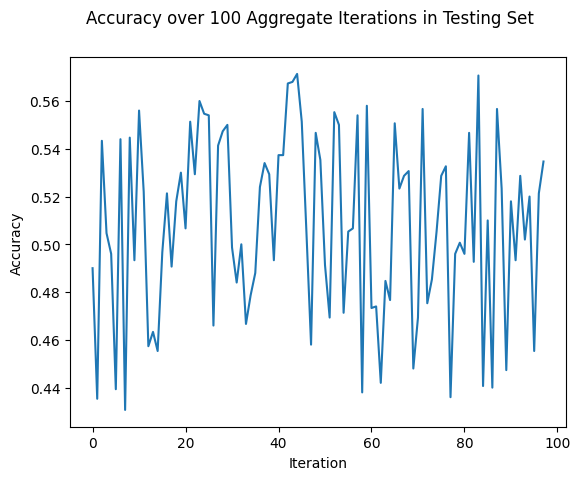

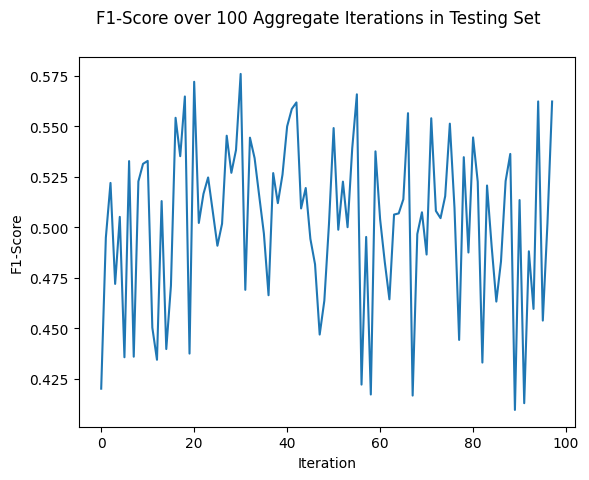

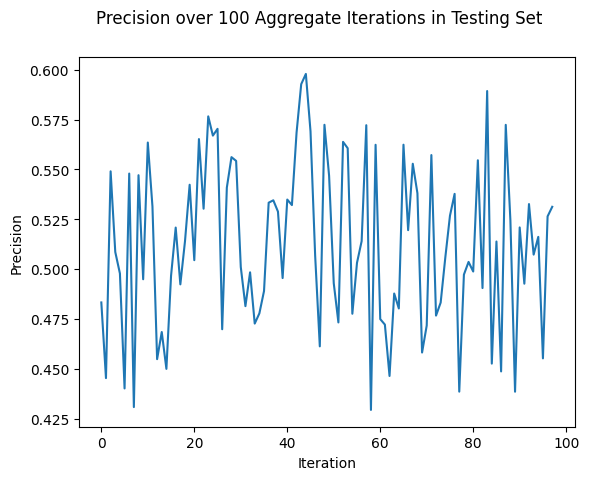

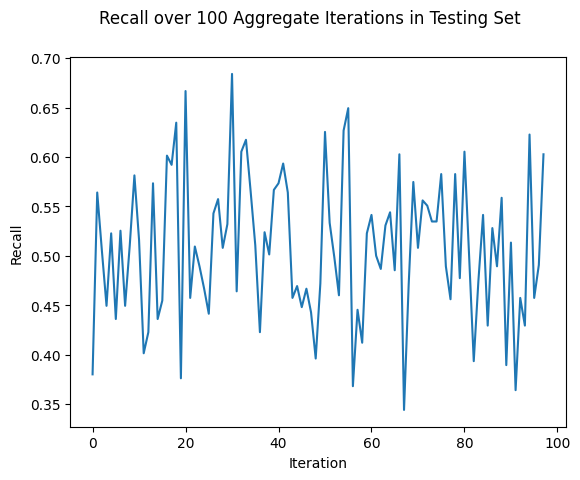

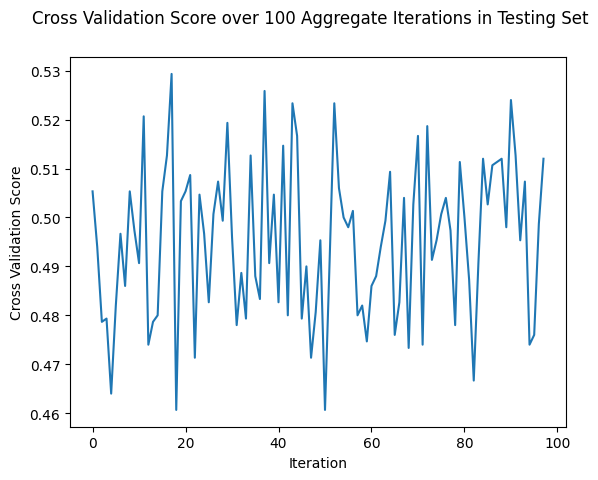

In [7]:
#Outputing Graphs of each metric per iteration
for metric in list(df_test.columns)[1:]:
    plt.figure()
    sns.lineplot(data = df_test, x = "Iteration", y = metric)
    plt.suptitle(f"{metric} over 100 Aggregate Iterations in Testing Set")
    plt.savefig(f"./Figures/SGD/{metric}_test_performance.png", dpi=100, bbox_inches = "tight")

In [18]:
#Outputting Median Final Testing Statistics
print(f"Testing Median Accuracy: {np.median(test_acc_list)}\nTesting Median F1-Score: {np.median(test_f1_list)}\nFinal Median Precision: {np.median(test_prec_list)}\nFinal Median Recall: {np.median(test_recall_list)}\nFinal Median Cross Validation Score: {np.median(test_cross_val_list)}")

Testing Median Accuracy: 0.5066666666666666
Testing Median F1-Score: 0.5076042271346266
Final Median Precision: 0.5112129455511808
Final Median Recall: 0.508
Final Median Cross Validation Score: 0.49666666666666665


In [10]:
df_final_analysis = pd.DataFrame()
df_final_analysis['Iteration'] = range(len(final_acc_list))
df_final_analysis['Accuracy'] = final_acc_list
df_final_analysis['F1-Score'] = final_f1_list
df_final_analysis['Precision'] = final_prec_list
df_final_analysis['Recall'] = final_recall_list
df_final_analysis['Cross Validation Score'] = final_cross_val_list
df_final_analysis['Best Training Iteration Value'] = final_training_iter_list
df_final_analysis['All Star Team Victory Count'] = final_all_star_victories
df_final_analysis['Challenger Team Victory Count'] = final_challenger_victories
df_final_analysis['Tie Count'] = final_ties

df_final_analysis.to_csv("./Data/All_star_evaluation.csv", sep='\t', index = False)
df_final_analysis

,Iteration,Accuracy,F1-Score,Precision,Recall,Cross Validation Score,Best Training Iteration Value,All Star Team Victory Count,Challenger Team Victory Count,Tie Count
0,0,0.364667,0.174382,0.260283,0.133333,0.800667,812,0,50,0
1,1,0.185333,0.000000,0.000000,0.000000,0.816667,705,0,50,0
2,2,0.780000,0.822188,0.700672,1.000000,0.839333,805,50,0,0
3,3,0.507333,0.488746,0.519403,0.466667,0.831333,679,12,30,8
4,4,0.470667,0.469930,0.476040,0.466667,0.818000,815,4,42,4
...,...,...,...,...,...,...,...,...,...,...
93,93,0.390000,0.248024,0.333236,0.200000,0.808000,807,0,50,0
94,94,0.635333,0.706103,0.598009,0.866667,0.815333,713,50,0,0
95,95,0.248667,0.000000,0.000000,0.000000,0.839333,801,0,50,0
96,96,0.691333,0.739449,0.647189,0.866667,0.801333,801,50,0,0


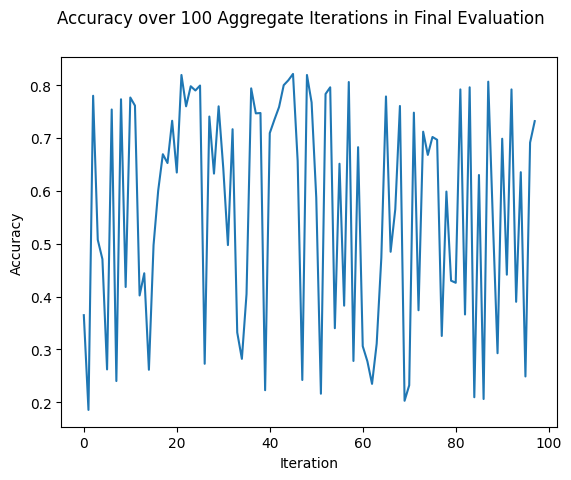

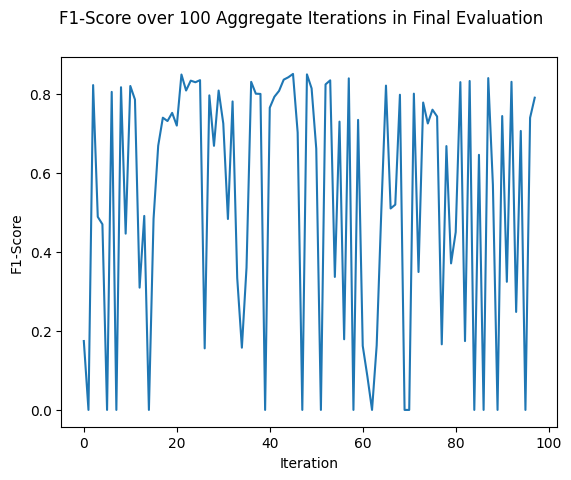

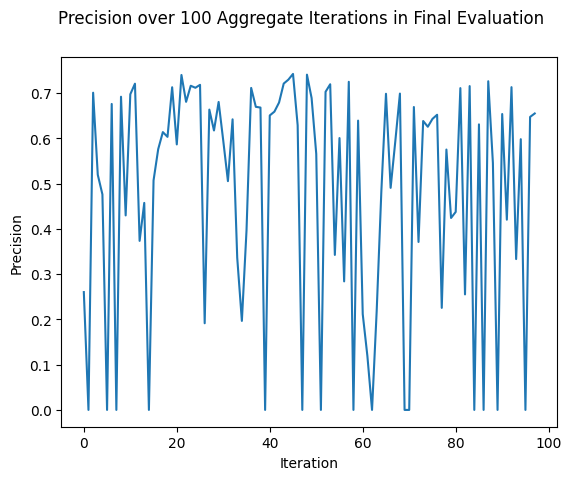

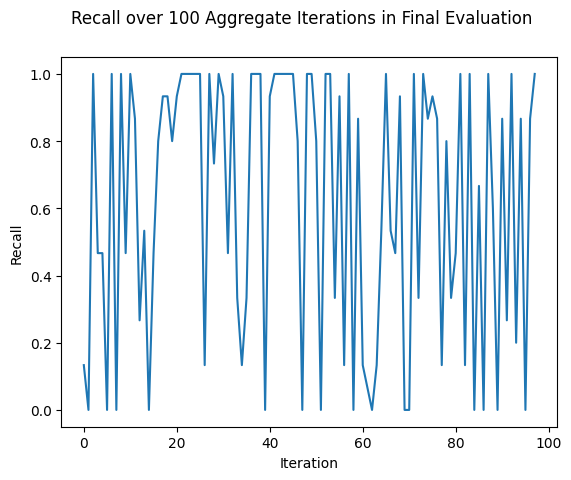

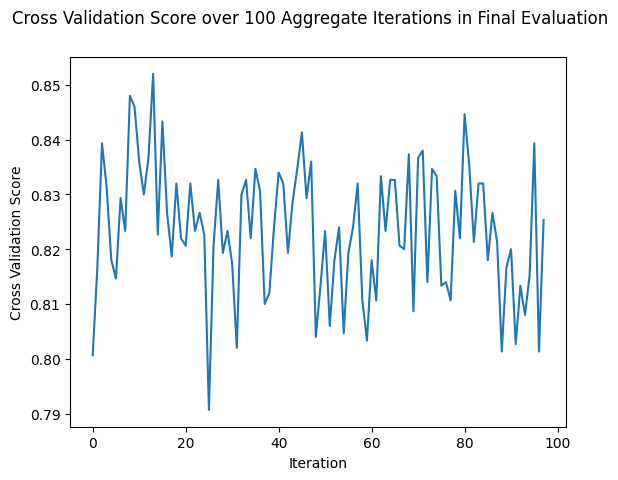

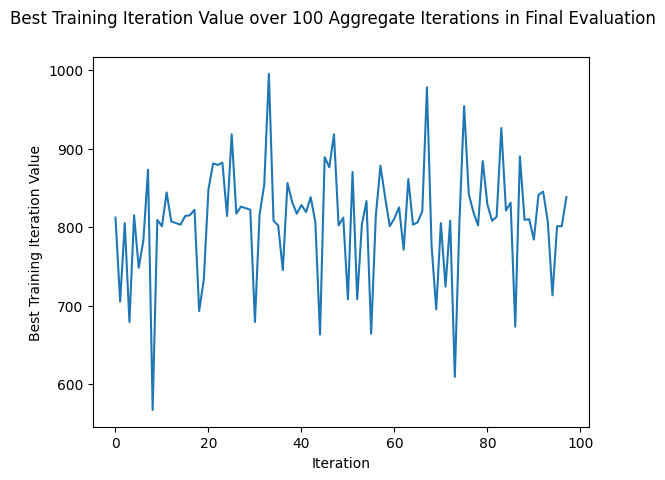

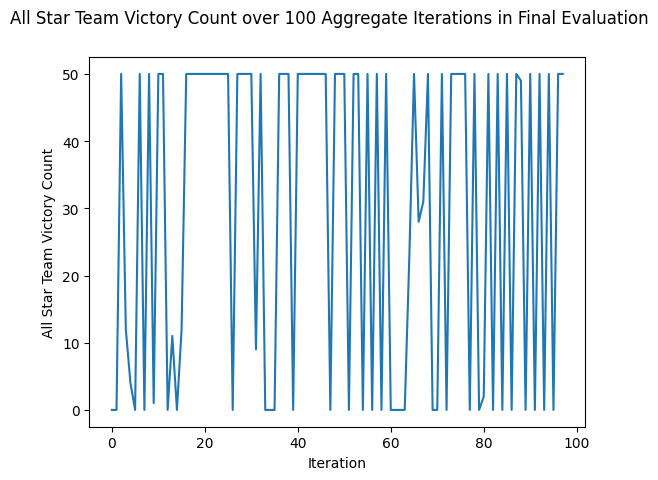

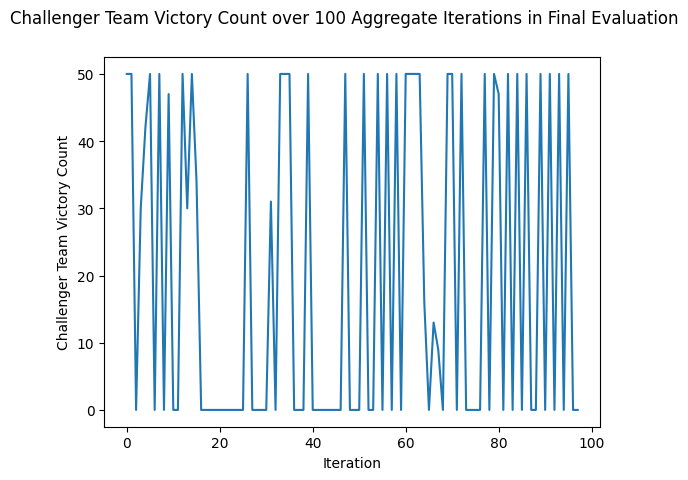

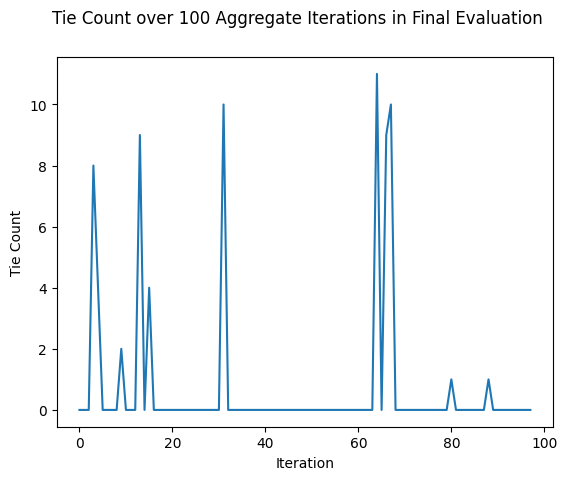

In [11]:
#Outputing Graphs of each metric per iteration
for metric in list(df_final_analysis.columns)[1:]:
    plt.figure()
    sns.lineplot(data = df_final_analysis, x = "Iteration", y = metric)
    plt.suptitle(f"{metric} over 100 Aggregate Iterations in Final Evaluation")
    plt.savefig(f"./Figures/SGD/{metric}_final_performance.png", dpi=100, bbox_inches = "tight")

In [15]:
#Outputting Median Final Evaluations Statistics
print(f"Final Median Accuracy: {np.median(final_acc_list)}\nFinal Median F1-Score: {np.median(final_f1_list)}\nFinal Median Precision: {np.median(final_prec_list)}\nFinal Median Average Recall: {np.median(final_recall_list)}\nFinal Median Cross Validation Score: {np.median(final_cross_val_list)}\n")
print(f"Median Best Training Iteration Count: {np.median(final_training_iter_list)}\nMedian All Star Victory Count: {np.median(final_all_star_victories)}\nMedian Challenger Victory Count: {np.median(final_challenger_victories)}\nMedian Tie Count: {np.median(final_ties)}")

Final Median Accuracy: 0.635
Final Median F1-Score: 0.7041114589000033
Final Median Precision: 0.5992446194415706
Final Median Average Recall: 0.7999999999999998
Final Median Cross Validation Score: 0.8233333333333333

Median Best Training Iteration Count: 813.5
Median All Star Victory Count: 50.0
Median Challenger Victory Count: 0.0
Median Tie Count: 0.0


### comment on final results here